# Лабораторная работа 1.1 Комплексная обработка данных из БД с помощью Pandas.


**Цель работы.** Получить практические навыки извлечения, преобразования и анализа данных из реляционных баз данных с использованием языка SQL и библиотеки Pandas в Python. В этой тетради мы рассмотрим ключевые операции для работы с данными, которые являются фундаментом для любого аналитика.

## Подготовка к работе

### 1. Необходимые библиотеки
Для выполнения заданий нам понадобятся две основные библиотеки:
- `pandas`: для работы с данными в формате таблиц (DataFrame).
- `sqlite3`: для подключения и выполнения запросов к базе данных SQLite.

Давайте импортируем их.

In [1]:
import pandas as pd
import sqlite3
import numpy as np

### 2. Подключение к базе данных

Мы будем использовать учебную базу данных `chinook.db`, которая содержит информацию о музыкальном магазине (исполнители, альбомы, треки, счета, клиенты).

**Важно:** Убедитесь, что файл `chinook.db` находится в той же папке, что и эта рабочая тетрадь.

Создадим подключение (connection) к базе данных.

In [2]:
try:
    conn = sqlite3.connect('chinook.db')
    print("Подключение к chinook.db успешно установлено.")
except sqlite3.Error as e:
    print(f"Ошибка при подключении к базе данных: {e}")

Подключение к chinook.db успешно установлено.


### 3. Схема базы данных
Прежде чем делать запросы, полезно понимать структуру базы данных.

<img src="https://www.sqlitetutorial.net/wp-content/uploads/2015/11/sqlite-sample-database-color.jpg" width="700"/>

Основные таблицы:
- `artists`: исполнители.
- `albums`: альбомы (связаны с `artists`).
- `tracks`: треки (связаны с `albums`, `genres`, `media_types`).
- `genres`: музыкальные жанры.
- `customers`: клиенты.
- `invoices`: счета (связаны с `customers`).
- `invoice_items`: позиции в счетах (связаны с `invoices` и `tracks`).

## Часть 1. Основы SQL-запросов и их интеграция с Pandas

Самый удобный способ выполнить SQL-запрос и сразу начать работать с его результатом в Python — это использовать функцию `pd.read_sql_query()`.

**Синтаксис:** `pd.read_sql_query('ВАШ SQL-ЗАПРОС', conn)`

### Задача 1. Выборка всех данных из таблицы
Получим список всех исполнителей из таблицы `artists`.

In [3]:
sql_query = "SELECT * FROM artists;"
artists_df = pd.read_sql_query(sql_query, conn)
artists_df.head() # .head() показывает первые 5 строк

,ArtistId,Name
0,1,AC/DC
1,2,Accept
2,3,Aerosmith
3,4,Alanis Morissette
4,5,Alice In Chains


### Задача 2. Выборка конкретных столбцов
Получим названия и ID альбомов из таблицы `albums`.

In [4]:
sql_query = "SELECT AlbumId, Title FROM albums;"
albums_df = pd.read_sql_query(sql_query, conn)
albums_df.head()

,AlbumId,Title
0,1,For Those About To Rock We Salute You
1,2,Balls to the Wall
2,3,Restless and Wild
3,4,Let There Be Rock
4,5,Big Ones


### Задача 3. Ограничение количества строк (`LIMIT`)
Получим только первые 10 треков из таблицы `tracks`.

In [5]:
sql_query = "SELECT TrackId, Name, Composer FROM tracks LIMIT 10;"
pd.read_sql_query(sql_query, conn)

,TrackId,Name,Composer
0,1,For Those About To Rock (We Salute You),"Angus Young, Malcolm Young, Brian Johnson"
1,2,Balls to the Wall,None
2,3,Fast As a Shark,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho..."
3,4,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D..."
4,5,Princess of the Dawn,Deaffy & R.A. Smith-Diesel
5,6,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson"
6,7,Let's Get It Up,"Angus Young, Malcolm Young, Brian Johnson"
7,8,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson"
8,9,Snowballed,"Angus Young, Malcolm Young, Brian Johnson"
9,10,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson"


### Задача 4. Фильтрация по числовому условию (`WHERE`)
Найдем все счета (`invoices`), сумма которых (`Total`) больше 20.

In [6]:
sql_query = "SELECT * FROM invoices WHERE Total > 20;"
pd.read_sql_query(sql_query, conn).head()

,InvoiceId,CustomerId,InvoiceDate,BillingAddress,BillingCity,BillingState,BillingCountry,BillingPostalCode,Total
0,96,45,2010-02-18 00:00:00,Erzsébet krt. 58.,Budapest,None,Hungary,H-1073,21.86
1,194,46,2011-04-28 00:00:00,3 Chatham Street,Dublin,Dublin,Ireland,None,21.86
2,299,26,2012-08-05 00:00:00,2211 W Berry Street,Fort Worth,TX,USA,76110,23.86
3,404,6,2013-11-13 00:00:00,Rilská 3174/6,Prague,None,Czech Republic,14300,25.86


### Задача 5. Фильтрация по текстовому значению (`WHERE`)
Найдем всех клиентов из Бразилии.

In [7]:
sql_query = "SELECT FirstName, LastName, Country FROM customers WHERE Country = 'Brazil';"
pd.read_sql_query(sql_query, conn)

,FirstName,LastName,Country
0,Luís,Gonçalves,Brazil
1,Eduardo,Martins,Brazil
2,Alexandre,Rocha,Brazil
3,Roberto,Almeida,Brazil
4,Fernanda,Ramos,Brazil


### Задача 6. Фильтрация по шаблону (`LIKE`)
Найдем все треки, в названии которых есть слово `Love`.

In [8]:
sql_query = "SELECT Name, Composer FROM tracks WHERE Name LIKE '%Love%';"
pd.read_sql_query(sql_query, conn)

,Name,Composer
0,Love In An Elevator,"Steven Tyler, Joe Perry"
1,"Love, Hate, Love","Jerry Cantrell, Layne Staley"
2,Let Me Love You Baby,Willie Dixon
3,My Love,Jauperi/Zeu Góes
4,The Girl I Love She Got Long Black Wavy Hair,Jimmy Page/John Bonham/John Estes/John Paul Jo...
...,...,...
109,Love Comes,"Darius ""Take One"" Minwalla/Jon Auer/Ken String..."
110,Arms Around Your Love,Chris Cornell
111,Love Is a Losing Game,None
112,I Heard Love Is Blind,None


### Задача 7. Фильтрация по нескольким возможным значениям (`IN`)
Найдем всех клиентов из Германии, Франции и Великобритании.

In [9]:
sql_query = "SELECT FirstName, LastName, Country FROM customers WHERE Country IN ('Germany', 'France', 'United Kingdom');"
pd.read_sql_query(sql_query, conn)

,FirstName,LastName,Country
0,Leonie,Köhler,Germany
1,Hannah,Schneider,Germany
2,Fynn,Zimmermann,Germany
3,Niklas,Schröder,Germany
4,Camille,Bernard,France
5,Dominique,Lefebvre,France
6,Marc,Dubois,France
7,Wyatt,Girard,France
8,Isabelle,Mercier,France
9,Emma,Jones,United Kingdom


### Задача 8. Фильтрация по диапазону (`BETWEEN`)
Найдем счета, выставленные в феврале 2010 года.

In [10]:
sql_query = "SELECT InvoiceId, CustomerId, InvoiceDate, Total FROM invoices WHERE InvoiceDate BETWEEN '2010-02-01' AND '2010-02-28';"
pd.read_sql_query(sql_query, conn)

,InvoiceId,CustomerId,InvoiceDate,Total
0,91,22,2010-02-08 00:00:00,1.98
1,92,24,2010-02-08 00:00:00,1.98
2,93,26,2010-02-09 00:00:00,3.96
3,94,30,2010-02-10 00:00:00,5.94
4,95,36,2010-02-13 00:00:00,8.91
5,96,45,2010-02-18 00:00:00,21.86
6,97,59,2010-02-26 00:00:00,1.99


### Задача 9. Сортировка данных (`ORDER BY`)
Выведем 10 самых дорогих счетов в порядке убывания суммы.

In [11]:
sql_query = "SELECT InvoiceId, BillingCountry, Total FROM invoices ORDER BY Total DESC LIMIT 10;"
pd.read_sql_query(sql_query, conn)

,InvoiceId,BillingCountry,Total
0,404,Czech Republic,25.86
1,299,USA,23.86
2,96,Hungary,21.86
3,194,Ireland,21.86
4,89,Austria,18.86
5,201,USA,18.86
6,88,Chile,17.91
7,306,Czech Republic,16.86
8,313,France,16.86
9,103,USA,15.86


## Часть 2. Объединение данных из нескольких таблиц (`JOIN`)

Сила реляционных баз данных — в возможности объединять таблицы по общим ключам. Основной инструмент для этого — оператор `JOIN`.

### Задача 10. Простое объединение (`INNER JOIN`)
Выведем названия треков и соответствующие им названия альбомов. Таблицы `tracks` и `albums` связаны полем `AlbumId`.

In [12]:
# Тройные кавычки """ позволяют писать запрос на нескольких строках для удобства
sql_query = """
SELECT
    t.Name AS TrackName, -- Используем псевдонимы (aliases) для наглядности
    a.Title AS AlbumTitle
FROM
    tracks t
INNER JOIN
    albums a ON t.AlbumId = a.AlbumId
LIMIT 10;
"""
pd.read_sql_query(sql_query, conn)

,TrackName,AlbumTitle
0,For Those About To Rock (We Salute You),For Those About To Rock We Salute You
1,Put The Finger On You,For Those About To Rock We Salute You
2,Let's Get It Up,For Those About To Rock We Salute You
3,Inject The Venom,For Those About To Rock We Salute You
4,Snowballed,For Those About To Rock We Salute You
5,Evil Walks,For Those About To Rock We Salute You
6,C.O.D.,For Those About To Rock We Salute You
7,Breaking The Rules,For Those About To Rock We Salute You
8,Night Of The Long Knives,For Those About To Rock We Salute You
9,Spellbound,For Those About To Rock We Salute You


### Задача 11. Объединение трех таблиц
Добавим к предыдущему запросу имя исполнителя. Таблицы `albums` и `artists` связаны полем `ArtistId`.

In [13]:
sql_query = """
SELECT
    t.Name AS TrackName,
    a.Title AS AlbumTitle,
    ar.Name AS ArtistName
FROM
    tracks t
INNER JOIN
    albums a ON t.AlbumId = a.AlbumId
INNER JOIN
    artists ar ON a.ArtistId = ar.ArtistId
LIMIT 10;
"""
pd.read_sql_query(sql_query, conn)

,TrackName,AlbumTitle,ArtistName
0,For Those About To Rock (We Salute You),For Those About To Rock We Salute You,AC/DC
1,Put The Finger On You,For Those About To Rock We Salute You,AC/DC
2,Let's Get It Up,For Those About To Rock We Salute You,AC/DC
3,Inject The Venom,For Those About To Rock We Salute You,AC/DC
4,Snowballed,For Those About To Rock We Salute You,AC/DC
5,Evil Walks,For Those About To Rock We Salute You,AC/DC
6,C.O.D.,For Those About To Rock We Salute You,AC/DC
7,Breaking The Rules,For Those About To Rock We Salute You,AC/DC
8,Night Of The Long Knives,For Those About To Rock We Salute You,AC/DC
9,Spellbound,For Those About To Rock We Salute You,AC/DC


### Задача 12. Использование `JOIN` вместе с `WHERE`
Найдем все треки группы 'Queen'.

In [14]:
sql_query = """
SELECT
    t.Name AS TrackName,
    a.Title AS AlbumTitle
FROM
    tracks t
INNER JOIN albums a ON t.AlbumId = a.AlbumId
INNER JOIN artists ar ON a.ArtistId = ar.ArtistId
WHERE ar.Name = 'Queen';
"""
pd.read_sql_query(sql_query, conn)

,TrackName,AlbumTitle
0,A Kind Of Magic,Greatest Hits II
1,Under Pressure,Greatest Hits II
2,Radio GA GA,Greatest Hits II
3,I Want It All,Greatest Hits II
4,I Want To Break Free,Greatest Hits II
5,Innuendo,Greatest Hits II
6,It's A Hard Life,Greatest Hits II
7,Breakthru,Greatest Hits II
8,Who Wants To Live Forever,Greatest Hits II
9,Headlong,Greatest Hits II


### Задача 13. `LEFT JOIN` для поиска значений, которых может не быть
Выведем всех исполнителей и названия их альбомов. `LEFT JOIN` покажет даже тех исполнителей, у которых нет альбомов в базе.

In [15]:
sql_query = """
SELECT
    ar.Name AS ArtistName,
    a.Title AS AlbumTitle
FROM
    artists ar
LEFT JOIN
    albums a ON ar.ArtistId = a.ArtistId
WHERE a.Title IS NULL; -- Найдем только тех, у кого нет альбомов
"""
pd.read_sql_query(sql_query, conn)

,ArtistName,AlbumTitle
0,Milton Nascimento & Bebeto,None
1,Azymuth,None
2,João Gilberto,None
3,Bebel Gilberto,None
4,Jorge Vercilo,None
...,...,...
66,DJ Dolores & Orchestra Santa Massa,None
67,Seu Jorge,None
68,Sabotage E Instituto,None
69,Stereo Maracana,None


### Задача 14. Анализ продаж по жанрам
Объединим 4 таблицы, чтобы узнать, треки какого жанра были проданы.

In [16]:
sql_query = """
SELECT
    i.InvoiceId,
    t.Name AS TrackName,
    g.Name AS GenreName
FROM
    invoices AS i
INNER JOIN
    invoice_items AS ii ON i.InvoiceId = ii.InvoiceId
INNER JOIN
    tracks AS t ON ii.TrackId = t.TrackId
INNER JOIN
    genres AS g ON t.GenreId = g.GenreId
LIMIT 15;
"""
try:
    sales_by_genre_df = pd.read_sql_query(sql_query, conn)
    display(sales_by_genre_df)
except Exception as e:
    print(f"Произошла ошибка: {e}")
    print("\nПожалуйста, выполните шаги из раздела 'Как исправить проблему с подключением'.")

,InvoiceId,TrackName,GenreName
0,98,Experiment In Terra,Sci Fi & Fantasy
1,98,Take the Celestra,Sci Fi & Fantasy
2,121,Shout It Out Loud,Rock
3,121,Calling Dr. Love,Rock
4,121,Strutter,Rock
5,121,Cold Gin,Rock
6,143,Think About You,Rock
7,143,Rocket Queen,Rock
8,143,Don't Cry (Original),Rock
9,143,Back off Bitch,Rock


In [17]:
# Этот код покажет РЕАЛЬНЫЕ названия всех таблиц в файле, к которому вы подключены
sql_get_tables = "SELECT name FROM sqlite_master WHERE type='table';"
tables_in_db = pd.read_sql_query(sql_get_tables, conn)

print("Таблицы, которые действительно есть в вашем файле chinook.db:")
print(tables_in_db)

Таблицы, которые действительно есть в вашем файле chinook.db:
               name
0            albums
1   sqlite_sequence
2           artists
3         customers
4         employees
5            genres
6          invoices
7     invoice_items
8       media_types
9         playlists
10   playlist_track
11           tracks
12     sqlite_stat1


In [18]:
sql_pragma_invoices = "PRAGMA table_info(invoices);"
columns_info_invoices = pd.read_sql_query(sql_pragma_invoices, conn)

print("Структура таблицы 'invoices':")
display(columns_info_invoices)

Структура таблицы 'invoices':


,cid,name,type,notnull,dflt_value,pk
0,0,InvoiceId,INTEGER,1,None,1
1,1,CustomerId,INTEGER,1,None,0
2,2,InvoiceDate,DATETIME,1,None,0
3,3,BillingAddress,NVARCHAR(70),0,None,0
4,4,BillingCity,NVARCHAR(40),0,None,0
5,5,BillingState,NVARCHAR(40),0,None,0
6,6,BillingCountry,NVARCHAR(40),0,None,0
7,7,BillingPostalCode,NVARCHAR(10),0,None,0
8,8,Total,"NUMERIC(10,2)",1,None,0


### Альтернативная Задача 14. Анализ жанров в плейлистах

**Цель.** Объединим 4 таблицы, чтобы узнать, треки какого жанра содержатся в каких плейлистах. Для этого мы используем существующую связующую таблицу `playlist_track`.

**Логика объединения:** `playlists` → `playlist_track` → `tracks` → `genres`



In [19]:
sql_query_alternative = """
SELECT
    p.Name AS PlaylistName,
    t.Name AS TrackName,
    g.Name AS GenreName
FROM
    playlists p
INNER JOIN
    playlist_track pt ON p.PlaylistId = pt.PlaylistId -- Связываем плейлист с его треками
INNER JOIN
    tracks t ON pt.TrackId = t.TrackId              -- Связываем ID трека с его данными
INNER JOIN
    genres g ON t.GenreId = g.GenreId               -- Связываем трек с его жанром
LIMIT 15;
"""
pd.read_sql_query(sql_query_alternative, conn)

,PlaylistName,TrackName,GenreName
0,Music,For Those About To Rock (We Salute You),Rock
1,Music,For Those About To Rock (We Salute You),Rock
2,Heavy Metal Classic,For Those About To Rock (We Salute You),Rock
3,Music,Balls to the Wall,Rock
4,Music,Balls to the Wall,Rock
5,Heavy Metal Classic,Balls to the Wall,Rock
6,Music,Fast As a Shark,Rock
7,90’s Music,Fast As a Shark,Rock
8,Music,Fast As a Shark,Rock
9,Heavy Metal Classic,Fast As a Shark,Rock


**Способ 2. Визуальный просмотр через DB Browser for SQLite**

Для быстрого обзора всей базы данных нет ничего лучше визуального инструмента.

*   **Откройте** файл chinook.db в программе **DB Browser for SQLite** (ссылка на нее была в материалах).
*   Перейдите на вкладку "**Структура базы данных**" (Database Structure).
*   Слева вы увидите список всех таблиц. Нажмите на любую из них (например, invoices), и справа отобразится полный список ее полей с типами данных.
*   На вкладке "**Данные**" (Browse Data) можно выбрать таблицу и посмотреть ее содержимое, что тоже помогает понять, какие данные в каких полях лежат.

## Часть 3. Агрегация и группировка данных

Агрегация позволяет вычислять итоговые метрики по набору данных, такие как количество, сумма, среднее и т.д. `GROUP BY` позволяет делать это для отдельных групп.

### Задача 15. Подсчет общего количества (`COUNT`)
Посчитаем общее количество клиентов в базе.

In [20]:
sql_query = "SELECT COUNT(CustomerId) AS TotalCustomers FROM customers;"
pd.read_sql_query(sql_query, conn)

,TotalCustomers
0,59


### Задача 16. Суммирование значений (`SUM`)
Посчитаем общую выручку магазина по всем счетам.

In [21]:
sql_query = "SELECT SUM(Total) AS TotalRevenue FROM invoices;"
pd.read_sql_query(sql_query, conn)

,TotalRevenue
0,2328.6


### Задача 17. Расчет среднего (`AVG`)
Найдем среднюю продолжительность трека в миллисекундах.

In [22]:
sql_query = "SELECT AVG(Milliseconds) AS AverageTrackLength FROM tracks;"
pd.read_sql_query(sql_query, conn)

,AverageTrackLength
0,393599.212104


### Задача 18. Группировка (`GROUP BY`)
Посчитаем, сколько клиентов в каждой стране.

In [23]:
sql_query = """
SELECT
    Country,
    COUNT(CustomerId) AS NumberOfCustomers
FROM customers
GROUP BY Country
ORDER BY NumberOfCustomers DESC;
"""
pd.read_sql_query(sql_query, conn)

,Country,NumberOfCustomers
0,USA,13
1,Canada,8
2,France,5
3,Brazil,5
4,Germany,4
5,United Kingdom,3
6,Portugal,2
7,India,2
8,Czech Republic,2
9,Sweden,1


### Задача 19. Группировка с `SUM`
Рассчитаем общую выручку по каждой стране.

In [24]:
sql_query = """
SELECT
    BillingCountry,
    SUM(Total) AS TotalRevenue
FROM invoices
GROUP BY BillingCountry
ORDER BY TotalRevenue DESC;
"""
pd.read_sql_query(sql_query, conn)

,BillingCountry,TotalRevenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


### Задача 20. Группировка с `JOIN`
Посчитаем, сколько треков у каждого исполнителя. Покажем топ-10.

In [25]:
sql_query = """
SELECT
    ar.Name AS ArtistName,
    COUNT(t.TrackId) AS NumberOfTracks
FROM artists ar
JOIN albums a ON ar.ArtistId = a.ArtistId
JOIN tracks t ON a.AlbumId = t.AlbumId
GROUP BY ar.Name
ORDER BY NumberOfTracks DESC
LIMIT 10;
"""
pd.read_sql_query(sql_query, conn)

,ArtistName,NumberOfTracks
0,Iron Maiden,213
1,U2,135
2,Led Zeppelin,114
3,Metallica,112
4,Lost,92
5,Deep Purple,92
6,Pearl Jam,67
7,Lenny Kravitz,57
8,Various Artists,56
9,The Office,53


### Задача 21. Фильтрация после группировки (`HAVING`)
Найдем исполнителей, у которых более 10 альбомов.

In [26]:
sql_query = """
SELECT
    ar.Name,
    COUNT(a.AlbumId) AS AlbumCount
FROM artists ar
JOIN albums a ON ar.ArtistId = a.ArtistId
GROUP BY ar.Name
HAVING AlbumCount > 10
ORDER BY AlbumCount DESC;
"""
pd.read_sql_query(sql_query, conn)

,Name,AlbumCount
0,Iron Maiden,21
1,Led Zeppelin,14
2,Deep Purple,11


### Задача 22. Самый прибыльный жанр
Определим, какой музыкальный жанр принес магазину больше всего денег.

In [27]:
sql_query = """
SELECT
    g.Name AS GenreName,
    SUM(ii.UnitPrice * ii.Quantity) AS GenreRevenue
FROM genres g
JOIN tracks t ON g.GenreId = t.GenreId
JOIN invoice_items ii ON t.TrackId = ii.TrackId
GROUP BY g.Name
ORDER BY GenreRevenue DESC;
"""
pd.read_sql_query(sql_query, conn)

,GenreName,GenreRevenue
0,Rock,826.65
1,Latin,382.14
2,Metal,261.36
3,Alternative & Punk,241.56
4,TV Shows,93.53
5,Jazz,79.20
6,Blues,60.39
7,Drama,57.71
8,R&B/Soul,40.59
9,Classical,40.59


## Часть 4. Взаимодействие Pandas и SQLite

Мы уже активно использовали `read_sql_query`. Теперь рассмотрим, как можно анализировать полученные данные в Pandas и как записывать данные из Pandas обратно в базу.

### Задача 23. Визуализация данных, полученных из SQL
Получим данные о выручке по странам и построим график.

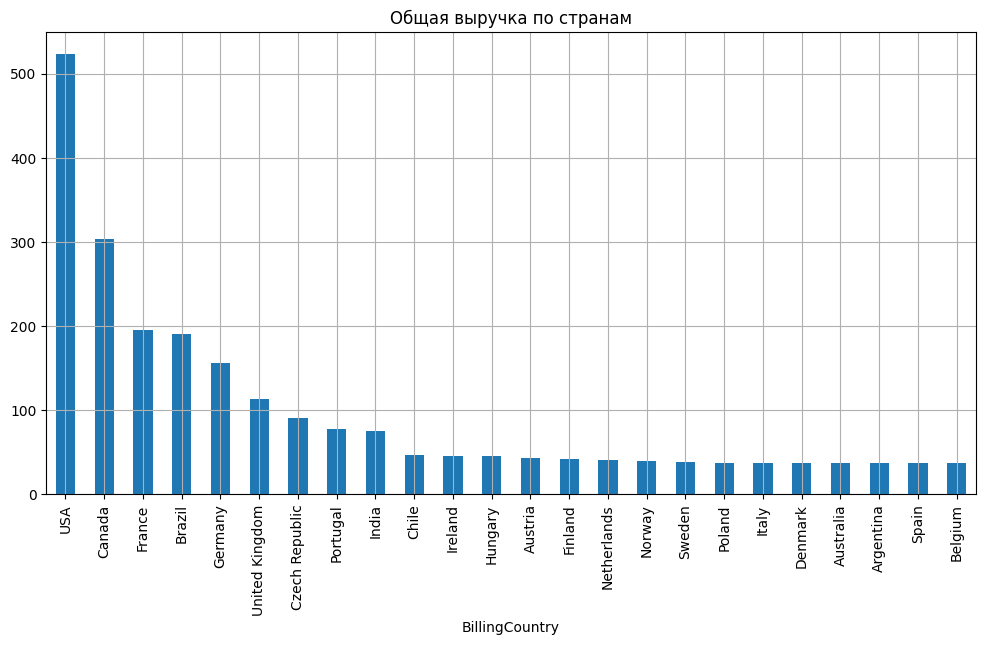

In [28]:
sql_query = """
SELECT
    BillingCountry,
    SUM(Total) AS TotalRevenue
FROM invoices
GROUP BY BillingCountry
ORDER BY TotalRevenue DESC;
"""
country_revenue_df = pd.read_sql_query(sql_query, conn)

# Используем встроенные возможности Pandas для построения графика
country_revenue_df.plot(kind='bar', x='BillingCountry', y='TotalRevenue',
                        figsize=(12, 6), title='Общая выручка по странам',
                        legend=False, grid=True);

### Задача 24. Создание вычисляемого столбца в Pandas
Получим данные о треках, а затем в Pandas рассчитаем их длительность в минутах.

In [29]:
sql_query = "SELECT Name, Milliseconds FROM tracks;"
tracks_df = pd.read_sql_query(sql_query, conn)

# Создаем новый столбец
tracks_df['Minutes'] = tracks_df['Milliseconds'] / 60000

tracks_df.head()

,Name,Milliseconds,Minutes
0,For Those About To Rock (We Salute You),343719,5.728650
1,Balls to the Wall,342562,5.709367
2,Fast As a Shark,230619,3.843650
3,Restless and Wild,252051,4.200850
4,Princess of the Dawn,375418,6.256967


### Задача 25. Использование `.describe()` для быстрой статистики
Получим все счета и посмотрим на описательную статистику по сумме чека.

In [30]:
invoices_df = pd.read_sql_query("SELECT * FROM invoices;", conn)
invoices_df['Total'].describe()

,Total
count,412.000000
mean,5.651942
std,4.745320
min,0.990000
25%,1.980000
50%,3.960000
75%,8.910000
max,25.860000


### Задача 26. Запись данных из DataFrame в таблицу SQL (`to_sql`)
Создадим небольшой DataFrame с новыми жанрами и запишем его в новую таблицу `new_genres`.

In [31]:
new_genres_data = {
    'Name': ['Synthwave', 'Lo-Fi', 'Phonk']
}
new_genres_df = pd.DataFrame(new_genres_data)

# Записываем DataFrame в SQL таблицу 'new_genres'
# if_exists='replace' означает, что если таблица уже есть, она будет перезаписана
# index=False означает, что индекс DataFrame не будет записан как отдельный столбец
try:
    new_genres_df.to_sql('new_genres', conn, if_exists='replace', index=False)
    print("Таблица 'new_genres' успешно создана/перезаписана.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

Таблица 'new_genres' успешно создана/перезаписана.


### Задача 27. Проверка созданной таблицы
Теперь прочитаем данные из только что созданной таблицы `new_genres`.

In [32]:
pd.read_sql_query("SELECT * FROM new_genres;", conn)

,Name
0,Synthwave
1,Lo-Fi
2,Phonk


### Задача 28. Анализ продаж по сотрудникам
Определим, какой сотрудник (Support Rep) принес компании больше всего денег.

In [33]:
sql_query = """
SELECT
    e.FirstName || ' ' || e.LastName AS EmployeeName, -- Конкатенация строк
    SUM(i.Total) as TotalSales
FROM employees e
JOIN customers c ON e.EmployeeId = c.SupportRepId
JOIN invoices i ON c.CustomerId = i.CustomerId
WHERE e.Title = 'Sales Support Agent'
GROUP BY EmployeeName
ORDER BY TotalSales DESC;
"""
pd.read_sql_query(sql_query, conn)

,EmployeeName,TotalSales
0,Jane Peacock,833.04
1,Margaret Park,775.40
2,Steve Johnson,720.16


### Задача 29. Анализ медианной стоимости трека по жанрам
Получим стоимость каждого трека, а затем в Pandas рассчитаем медиану для каждого жанра. Медиана более устойчива к выбросам, чем среднее.

In [34]:
sql_query = """
SELECT
    g.Name AS Genre,
    t.UnitPrice
FROM tracks t
JOIN genres g ON t.GenreId = g.GenreId
"""
genre_prices_df = pd.read_sql_query(sql_query, conn)

# Группируем и считаем медиану в Pandas
median_price_by_genre = genre_prices_df.groupby('Genre')['UnitPrice'].median().sort_values(ascending=False)
print(median_price_by_genre)

Genre
Drama                 1.99
Comedy                1.99
Sci Fi & Fantasy      1.99
TV Shows              1.99
Science Fiction       1.99
Classical             0.99
Alternative           0.99
Alternative & Punk    0.99
Blues                 0.99
Electronica/Dance     0.99
Easy Listening        0.99
Bossa Nova            0.99
Heavy Metal           0.99
Metal                 0.99
Hip Hop/Rap           0.99
Jazz                  0.99
Latin                 0.99
R&B/Soul              0.99
Pop                   0.99
Opera                 0.99
Reggae                0.99
Rock And Roll         0.99
Rock                  0.99
Soundtrack            0.99
World                 0.99
Name: UnitPrice, dtype: float64


### Задача 30. Поиск топ-5 клиентов по сумме покупок
Найдем 5 самых лояльных клиентов, потративших больше всего денег.

In [35]:
sql_query = """
SELECT
    c.FirstName || ' ' || c.LastName AS CustomerName,
    SUM(i.Total) AS TotalSpent
FROM customers c
JOIN invoices i ON c.CustomerId = i.CustomerId
GROUP BY CustomerName
ORDER BY TotalSpent DESC
LIMIT 5;
"""
pd.read_sql_query(sql_query, conn)

,CustomerName,TotalSpent
0,Helena Holý,49.62
1,Richard Cunningham,47.62
2,Luis Rojas,46.62
3,Ladislav Kovács,45.62
4,Hugh O'Reilly,45.62


## Часть 5. Индивидуальные задания для самостоятельной работы

**Инструкция:**
1.  Выберите задание, соответствующее вашему варианту.
2.  В ячейке под вашим вариантом напишите код для решения всех 5 пунктов.
3.  Для каждого пункта используйте `pd.read_sql_query()` для выполнения SQL-запроса.
4.  Результат выполнения каждого пункта выведите на экран (например, `display(df)` или `print(df)`).

### Вариант 1

1.  **(SQLite)**: Найдите всех клиентов (`customers`) из города 'Prague'. Выведите их имя, фамилию и email.
2.  **(SQLite)**: Используя `JOIN`, выведите названия всех треков (`tracks`) из альбома 'For Those About To Rock We Salute You'.
3.  **(SQLite)**: Посчитайте, сколько всего альбомов у исполнителя (`artists`) 'Led Zeppelin'.
4.  **(Pandas/SQL)**: Выполните SQL-запрос, чтобы получить имя, фамилию и страну всех клиентов. Загрузите результат в DataFrame и создайте новый столбец `full_name`, объединяющий имя и фамилию.
5.  **(Pandas/SQL)**: Получите из базы данных все счета (`invoices`). С помощью Pandas определите, в какой стране (`BillingCountry`) была самая большая общая сумма продаж (`Total`).

In [ ]:
# Ваш код для варианта 1

### Вариант 2

1.  **(SQLite)**: Найдите все счета (`invoices`) на сумму (`Total`) более 15. Выведите ID счета, дату и сумму.
2.  **(SQLite)**: Используя `JOIN`, выведите названия всех треков (`tracks`), относящихся к жанру 'Rock'.
3.  **(SQLite)**: Рассчитайте общую продолжительность (в минутах) всех треков в плейлисте 'Music'. Результат округлите до двух знаков после запятой.
4.  **(Pandas/SQL)**: Выполните SQL-запрос, чтобы получить названия треков и их жанры. Загрузите результат в DataFrame и посчитайте, сколько треков относится к каждому жанру с помощью Pandas.
5.  **(Pandas/SQL)**: Получите из базы данных всех сотрудников (`employees`). С помощью Pandas создайте столбец `email_provider`, извлекая домен из их электронной почты (часть после символа `@`).

In [ ]:
# Ваш код для варианта 2

### Вариант 3

1.  **(SQLite)**: Найдите все треки (`tracks`), написанные композитором 'AC/DC'. Выведите их названия.
2.  **(SQLite)**: Используя `JOIN`, определите, клиенты из каких стран совершали покупки (представлены в `invoices`). Выведите уникальный список стран.
3.  **(SQLite)**: Посчитайте среднюю стоимость одной позиции в счете (`invoice_items`).
4.  **(Pandas/SQL)**: Получите все треки с их продолжительностью в миллисекундах. Загрузите в DataFrame и создайте столбец `DurationCategory` со значениями 'Short' (< 180000 ms), 'Medium' (180000-300000 ms) и 'Long' (> 300000 ms).
5.  **(Pandas/SQL)**: Получите из базы данных все счета (`invoices`). С помощью Pandas сгруппируйте данные по годам и посчитайте общую сумму продаж за каждый год.

In [ ]:
# Ваш код для варианта 3

### Вариант 4

1.  **(SQLite)**: Найдите все медиатипы (`media_types`), название которых содержит слово 'Audio'.
2.  **(SQLite)**: Используя `JOIN`, выведите имена и фамилии клиентов (`customers`), которые покупали треки (`tracks`) исполнителя 'U2'.
3.  **(SQLite)**: Найдите 5 самых длинных треков в базе. Выведите их название и продолжительность в миллисекундах.
4.  **(Pandas/SQL)**: Получите из базы данных всех клиентов (`customers`) с указанием ID их персонального менеджера (`SupportRepId`). Загрузите в DataFrame и добавьте новый столбец `HasManager` (True, если `SupportRepId` не пустой, иначе False).
5.  **(Pandas/SQL)**: Получите данные о продажах (`invoice_items`) с ценой и количеством. Загрузите в DataFrame и создайте столбец `TotalPrice`, перемножив цену на количество. Затем найдите 5 самых прибыльных позиций в заказах.

In [ ]:
# Ваш код для варианта 4

### Вариант 5

1.  **(SQLite)**: Найдите всех сотрудников (`employees`), которые были наняты в 2002 году.
2.  **(SQLite)**: Используя `JOIN`, выведите названия всех плейлистов, в которых есть хотя бы один трек группы 'Metallica'.
3.  **(SQLite)**: Посчитайте, сколько треков в каждом жанре (`genres`). Отсортируйте результат по убыванию количества треков.
4.  **(Pandas/SQL)**: Получите все счета (`invoices`) с указанием `BillingCity` и `Total`. Загрузите в DataFrame и посчитайте средний чек для каждого города.
5.  **(Pandas/SQL)**: Получите из базы данных все треки (`tracks`). С помощью Pandas найдите 10 самых часто встречающихся композиторов.

In [ ]:
# Ваш код для варианта 5

### Варианты 6-35 (Аналогичная структура)

Задания для остальных вариантов строятся по тому же принципу, комбинируя различные фильтры, таблицы для `JOIN` и методы агрегации. Ниже приведены все варианты.

### Вариант 6
1.  **(SQLite)**: Выведите список всех стран (`Country`) клиентов, исключая дубликаты.
2.  **(SQLite)**: Используя `JOIN`, найдите все треки (`tracks`) из жанра 'Jazz' и 'Blues'.
3.  **(SQLite)**: Рассчитайте общую стоимость (`Total`) всех счетов (`invoices`), оплаченных в 2012 году.
4.  **(Pandas/SQL)**: Получите ID всех клиентов и ID их менеджеров по продажам (`SupportRepId`). Загрузите в DataFrame и посчитайте, сколько клиентов у каждого менеджера.
5.  **(Pandas/SQL)**: Получите все треки с их ценой (`UnitPrice`). С помощью Pandas найдите треки, цена которых выше 75-го перцентиля (квантиля 0.75).

In [ ]:
# Ваш код для варианта 6

### Вариант 7
1.  **(SQLite)**: Найдите всех клиентов (`customers`), у которых не указан почтовый индекс (`PostalCode`).
2.  **(SQLite)**: Используя `JOIN`, выведите названия треков (`tracks`), которые входят в плейлист '90’s Music'.
3.  **(SQLite)**: Найдите общую сумму продаж (`Total`) для каждого города (`BillingCity`). Выведите топ-5 городов по выручке.
4.  **(Pandas/SQL)**: Получите имена и фамилии всех сотрудников (`employees`) и их должности (`Title`). Загрузите в DataFrame и создайте столбец `IsAgent` со значением True, если должность содержит слово 'Agent'.
5.  **(Pandas/SQL)**: Получите все альбомы (`albums`). С помощью Pandas определите, у какого исполнителя (`ArtistId`) больше всего альбомов в базе.

In [ ]:
# Ваш код для варианта 7

### Вариант 8
1.  **(SQLite)**: Найдите все счета (`invoices`), у которых страна доставки (`BillingCountry`) не 'USA'.
2.  **(SQLite)**: Используя `JOIN`, выведите названия альбомов (`albums`), содержащих треки жанра 'Metal'.
3.  **(SQLite)**: Определите минимальную, максимальную и среднюю цену трека (`UnitPrice`) в таблице `tracks`.
4.  **(Pandas/SQL)**: Получите все треки с их размером в байтах (`Bytes`). Загрузите в DataFrame, создайте столбец `Megabytes`, разделив байты на (1024*1024), и отсортируйте топ-5 самых "тяжелых" треков.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`) с датами. Используя Pandas, найдите, в какой месяц (независимо от года) было совершено больше всего покупок (транзакций).

In [ ]:
# Ваш код для варианта 8

### Вариант 9
1.  **(SQLite)**: Найдите все плейлисты (`playlists`), название которых начинается с буквы 'M'.
2.  **(SQLite)**: Используя `JOIN`, выведите имена и фамилии сотрудников (`employees`) и их руководителей (используя `ReportsTo`).
3.  **(SQLite)**: Посчитайте количество треков (`tracks`) для каждого медиатипа (`media_types`).
4.  **(Pandas/SQL)**: Получите все счета (`invoices`). Загрузите в DataFrame и создайте столбец `IsLargePurchase` со значением True, если `Total` > 10.
5.  **(Pandas/SQL)**: Получите всех клиентов (`customers`) с их адресами. Загрузите в DataFrame и посчитайте, сколько клиентов проживает в каждом городе.

In [ ]:
# Ваш код для варианта 9

### Вариант 10
1.  **(SQLite)**: Найдите все треки (`tracks`), цена которых (`UnitPrice`) равна 0.99.
2.  **(SQLite)**: Используя `JOIN`, выведите названия треков (`tracks`) и их медиатип (`media_types`).
3.  **(SQLite)**: Найдите клиента (`customers`), который потратил больше всего денег. Выведите его имя и общую сумму трат.
4.  **(Pandas/SQL)**: Получите всех исполнителей (`artists`). Загрузите в DataFrame и создайте столбец `NameLength`, содержащий длину имени исполнителя.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`) с датами. Используя Pandas, определите, в какой день недели (понедельник, вторник и т.д.) совершается больше всего покупок.

In [ ]:
# Ваш код для варианта 10

### Варианты 11-35

Задания для последующих вариантов продолжают использовать те же принципы, варьируя параметры и комбинации запросов.

### Вариант 11
1.  **(SQLite)**: Найдите все треки, у которых композитор не указан (`Composer` IS NULL).
2.  **(SQLite)**: Используя `JOIN`, выведите имена клиентов и даты их счетов (`InvoiceDate`).
3.  **(SQLite)**: Посчитайте, сколько треков в каждом альбоме группы 'Iron Maiden'.
4.  **(Pandas/SQL)**: Получите все треки с ценой и размером в байтах. Загрузите в DataFrame и создайте столбец `BytesPerDollar`, разделив размер на цену. Обработайте случаи, где цена равна нулю.
5.  **(Pandas/SQL)**: Получите всех клиентов. С помощью Pandas определите, сколько клиентов имеют email на домене 'yahoo.com'.

In [ ]:
# Ваш код для варианта 11

### Вариант 12
1.  **(SQLite)**: Найдите все адреса доставки (`BillingAddress`), которые содержат 'St.'.
2.  **(SQLite)**: Используя `JOIN`, выведите имена треков, которые покупал клиент с `CustomerId` = 10.
3.  **(SQLite)**: Рассчитайте общую сумму продаж (`Total`) для каждого сотрудника (`SupportRepId`).
4.  **(Pandas/SQL)**: Получите все альбомы (`albums`) с `ArtistId`. Загрузите в DataFrame и создайте столбец `IsSoloArtist`, если `ArtistId` встречается только один раз.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas найдите средний интервал времени (в днях) между покупками для каждого клиента.

In [ ]:
# Ваш код для варианта 12

### Вариант 13
1.  **(SQLite)**: Найдите все треки, длительность которых (`Milliseconds`) находится между 3 и 4 минутами (180000 и 240000 мс).
2.  **(SQLite)**: Используя `JOIN`, выведите имена клиентов и их email, которые покупали треки жанра 'Classical'.
3.  **(SQLite)**: Посчитайте, сколько раз был продан каждый трек. Выведите топ-10 самых продаваемых треков.
4.  **(Pandas/SQL)**: Получите все треки с их ценой. Загрузите в DataFrame и создайте столбец `PriceCategory` ('Standard' для цены 0.99, 'Premium' для 1.99, 'Other' для остальных).
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas посчитайте нарастающий итог (cumulative sum) по сумме продаж (`Total`) в хронологическом порядке.

In [ ]:
# Ваш код для варианта 13

### Вариант 14
1.  **(SQLite)**: Найдите всех клиентов (`customers`), чье имя начинается на 'A'.
2.  **(SQLite)**: Используя `JOIN`, выведите названия треков (`tracks`), которые никогда не продавались (отсутствуют в `invoice_items`).
3.  **(SQLite)**: Для каждого года посчитайте, сколько было совершено покупок (`invoices`).
4.  **(Pandas/SQL)**: Получите имена и фамилии сотрудников, а также даты их найма. Загрузите в DataFrame и создайте столбец `Seniority`, который будет равен количеству полных лет работы в компании до текущей даты.
5.  **(Pandas/SQL)**: Получите все альбомы (`albums`). С помощью Pandas сгруппируйте их по `ArtistId` и посчитайте количество альбомов для каждого исполнителя.

In [ ]:
# Ваш код для варианта 14

### Вариант 15
1.  **(SQLite)**: Найдите все счета (`invoices`), которые были выставлены клиентам из Канады (`Canada`) или Германии (`Germany`).
2.  **(SQLite)**: Используя `JOIN`, выведите имена всех исполнителей, у которых нет ни одного альбома в базе данных.
3.  **(SQLite)**: Рассчитайте общую продолжительность (в часах) всех треков в жанре 'Rock'.
4.  **(Pandas/SQL)**: Получите все треки с их названием и названием альбома. Загрузите в DataFrame и создайте столбец `IsSoundtrack`, если в названии альбома есть слово 'Soundtrack'.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas рассчитайте скользящее среднее (на 3 покупки) для суммы (`Total`).

In [ ]:
# Ваш код для варианта 15

### Вариант 16
1.  **(SQLite)**: Выведите список всех должностей (`Title`) сотрудников, исключая дубликаты.
2.  **(SQLite)**: Используя `JOIN`, найдите все треки (`tracks`), написанные композитором 'Jimi Hendrix'.
3.  **(SQLite)**: Рассчитайте, сколько всего позиций (`invoice_items`) в каждом счете (`InvoiceId`).
4.  **(Pandas/SQL)**: Получите все треки с их названием и ценой. Загрузите в DataFrame и создайте столбец `PriceWithTax` (цена, увеличенная на 20%).
5.  **(Pandas/SQL)**: Получите все счета (`invoices`) с датами. Используя Pandas, найдите, в какой квартал (1, 2, 3, 4) было совершено больше всего транзакций.

In [ ]:
# Ваш код для варианта 16

### Вариант 17
1.  **(SQLite)**: Найдите все альбомы (`albums`), название которых содержит цифру.
2.  **(SQLite)**: Используя `JOIN`, выведите названия треков (`tracks`) и жанров (`genres`) для исполнителя 'Deep Purple'.
3.  **(SQLite)**: Рассчитайте общую сумму продаж (`Total`) для каждого клиента. Выведите топ-5.
4.  **(Pandas/SQL)**: Получите все треки. Загрузите в DataFrame и найдите все треки, у которых нет композитора (значение `Composer` - `None` или `NaN`).
5.  **(Pandas/SQL)**: Получите все счета (`invoices`) с `BillingCountry`. Используя Pandas, определите долю (в процентах) продаж каждой страны от общей выручки.

In [ ]:
# Ваш код для варианта 17

### Вариант 18
1.  **(SQLite)**: Найдите всех клиентов (`customers`), чья фамилия заканчивается на 's'.
2.  **(SQLite)**: Используя `JOIN`, выведите названия треков (`tracks`) и их медиатип для альбома 'Californication'.
3.  **(SQLite)**: Найдите, сколько счетов (`invoices`) было выставлено в каждом месяце 2011 года.
4.  **(Pandas/SQL)**: Получите все треки (`tracks`) с их длительностью в миллисекундах. Загрузите в DataFrame и найдите 5 самых коротких треков.
5.  **(Pandas/SQL)**: Получите всех клиентов (`customers`) с их странами. Используя Pandas, создайте сводную таблицу (pivot table), показывающую количество клиентов по каждой стране.

In [ ]:
# Ваш код для варианта 18

### Вариант 19
1.  **(SQLite)**: Найдите всех сотрудников (`employees`), которые подчиняются руководителю с `EmployeeId` = 1 (Andrew Adams).
2.  **(SQLite)**: Используя `JOIN`, выведите имена и email клиентов, купивших хотя бы один трек из жанра 'Pop'.
3.  **(SQLite)**: Рассчитайте, сколько альбомов выпустил каждый исполнитель. Выведите топ-10.
4.  **(Pandas/SQL)**: Получите все треки (`tracks`) с их ценой. Загрузите в DataFrame, а затем отфильтруйте и покажите только те, цена которых равна 1.99.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas определите, есть ли счета с нулевой суммой (`Total` = 0).

In [ ]:
# Ваш код для варианта 19

### Вариант 20
1.  **(SQLite)**: Найдите все треки (`tracks`), размер которых (`Bytes`) больше 50 МБ (50 * 1024 * 1024 байт).
2.  **(SQLite)**: Используя `JOIN`, выведите названия альбомов (`albums`) исполнителя 'Red Hot Chili Peppers'.
3.  **(SQLite)**: Найдите самый продаваемый жанр (по количеству проданных треков).
4.  **(Pandas/SQL)**: Получите всех сотрудников с их датами рождения (`BirthDate`). Загрузите в DataFrame и создайте столбец `Age`, рассчитав их возраст.
5.  **(Pandas/SQL)**: Получите все проданные позиции (`invoice_items`). С помощью Pandas создайте сводную таблицу, показывающую, сколько единиц каждого трека (`TrackId`) было продано.

In [ ]:
# Ваш код для варианта 20

### Вариант 21
1.  **(SQLite)**: Найдите все треки (`tracks`), у которых `Composer` - 'Steve Harris'.
2.  **(SQLite)**: Используя `JOIN`, выведите имена клиентов (`customers`) из 'USA', которые потратили более 40 долларов за все время.
3.  **(SQLite)**: Для каждого исполнителя (`artists`) посчитайте среднюю длину трека в секундах.
4.  **(Pandas/SQL)**: Получите все треки с их ID и ID альбома. Загрузите в DataFrame и проверьте, есть ли треки, не принадлежащие ни одному альбому (`AlbumId` is NULL).
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas сгруппируйте данные по `BillingCountry` и `BillingCity` и посчитайте общую сумму продаж.

In [ ]:
# Ваш код для варианта 21

### Вариант 22
1.  **(SQLite)**: Найдите все города клиентов (`City`), которые начинаются на 'S' и заканчиваются на 'o'.
2.  **(SQLite)**: Используя `JOIN`, выведите имена и фамилии клиентов, которые не совершили ни одной покупки.
3.  **(SQLite)**: Определите 3 самых популярных медиатипа (`media_types`) по количеству проданных треков.
4.  **(Pandas/SQL)**: Получите все треки с их ID и названием. Загрузите в DataFrame и создайте столбец `NameContainsNumber`, который будет True, если в названии трека есть цифра.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`) с датой и суммой. Используя Pandas, найдите общую выручку за каждый месяц каждого года.

In [ ]:
# Ваш код для варианта 22

### Вариант 23
1.  **(SQLite)**: Найдите все треки (`tracks`), цена которых больше 1.00 и которые относятся к жанру 'Rock'.
2.  **(SQLite)**: Используя `JOIN`, выведите имена исполнителей и названия альбомов, выпущенных после 1 января 2000 года (логика: в базе нет дат релиза, используем треки из `invoices` после этой даты).
3.  **(SQLite)**: Рассчитайте, сколько клиентов обслуживает каждый менеджер по продажам (`Sales Support Agent`).
4.  **(Pandas/SQL)**: Получите все альбомы с их названиями. Загрузите в DataFrame и создайте столбец `WordCount`, посчитав количество слов в названии каждого альбома.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas найдите топ-3 месяца с самой высокой выручкой за всю историю.

In [ ]:
# Ваш код для варианта 23

### Вариант 24
1.  **(SQLite)**: Найдите все треки (`tracks`), которые не относятся к жанрам 'Rock', 'Latin', 'Metal'.
2.  **(SQLite)**: Используя `JOIN`, выведите имена и фамилии клиентов, чьим менеджером является Jane Peacock (`EmployeeId`=3).
3.  **(SQLite)**: Определите, какой исполнитель (`artists`) имеет самую большую среднюю продолжительность треков.
4.  **(Pandas/SQL)**: Получите все треки с их названием и названием композитора. Загрузите в DataFrame и найдите всех композиторов, которые также являются исполнителями (присутствуют в таблице `artists`).
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas определите, есть ли клиенты, которые совершили всего одну покупку.

In [ ]:
# Ваш код для варианта 24

### Вариант 25
1.  **(SQLite)**: Найдите все треки (`tracks`), название которых состоит ровно из 3 слов (подсказка: `LIKE '_% _% _'` но без `_` в конце).
2.  **(SQLite)**: Используя `JOIN`, выведите имена и фамилии всех американских (`USA`) клиентов и имена их менеджеров по продажам.
3.  **(SQLite)**: Посчитайте, сколько треков каждого жанра было продано. Выведите топ-5 жанров по продажам.
4.  **(Pandas/SQL)**: Получите все треки с ценой (`UnitPrice`). Загрузите в DataFrame и найдите стандартное отклонение цены для каждого жанра (`GenreId`).
5.  **(Pandas/SQL)**: Получите всех клиентов (`customers`) с их email. С помощью Pandas проверьте, все ли email адреса уникальны.

In [ ]:
# Ваш код для варианта 25

### Вариант 26
1.  **(SQLite)**: Найдите все треки (`tracks`), цена которых не равна 0.99.
2.  **(SQLite)**: Используя `JOIN`, выведите названия альбомов (`albums`) и имена их исполнителей (`artists`).
3.  **(SQLite)**: Рассчитайте общую выручку (`Total`) по каждому году (`invoices`).
4.  **(Pandas/SQL)**: Получите все треки с их названием и продолжительностью. Загрузите в DataFrame и создайте столбец `IsShort`, если трек короче 2 минут (120000 мс).
5.  **(Pandas/SQL)**: Получите всех клиентов. С помощью Pandas посчитайте, сколько клиентов в каждой стране.

In [ ]:
# Ваш код для варианта 26

### Вариант 27
1.  **(SQLite)**: Найдите все треки (`tracks`), которые относятся к `MediaTypeId` 1 и 2.
2.  **(SQLite)**: Используя `JOIN`, выведите имена клиентов (`customers`) и общую сумму их покупок (`Total`).
3.  **(SQLite)**: Посчитайте, сколько треков (`tracks`) в каждом жанре (`genres`).
4.  **(Pandas/SQL)**: Получите все треки (`tracks`) с их ценой. Загрузите в DataFrame и создайте столбец `IsFree`, если цена равна 0.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas найдите среднюю сумму покупки для каждого года.

In [ ]:
# Ваш код для варианта 27

### Вариант 28
1.  **(SQLite)**: Найдите все треки (`tracks`), название которых длиннее 40 символов.
2.  **(SQLite)**: Используя `JOIN`, выведите названия треков (`tracks`) и плейлистов (`playlists`), в которые они входят.
3.  **(SQLite)**: Рассчитайте общую продолжительность (в минутах) всех альбомов исполнителя 'AC/DC'.
4.  **(Pandas/SQL)**: Получите все треки. Загрузите в DataFrame и создайте столбец `ComposerExists`, если у трека есть композитор.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas найдите, сколько покупок было совершено в каждой стране.

In [ ]:
# Ваш код для варианта 28

### Вариант 29
1.  **(SQLite)**: Найдите все счета (`invoices`), общая сумма которых (`Total`) кратна 5.
2.  **(SQLite)**: Используя `JOIN`, выведите имена и фамилии клиентов, которые покупали треки жанра 'Reggae'.
3.  **(SQLite)**: Определите, сколько всего треков (`tracks`) было продано в каждом году.
4.  **(Pandas/SQL)**: Получите все альбомы. Загрузите в DataFrame и создайте столбец `HasLongTitle`, если название альбома длиннее 20 символов.
5.  **(Pandas/SQL)**: Получите всех клиентов. С помощью Pandas посчитайте, сколько клиентов имеют одинаковые фамилии.

In [ ]:
# Ваш код для варианта 29

### Вариант 30
1.  **(SQLite)**: Найдите все треки (`tracks`), название которых заканчивается на 's'.
2.  **(SQLite)**: Используя `JOIN`, выведите имена и фамилии сотрудников (`employees`) и общее количество клиентов (`customers`), которых они обслуживают.
3.  **(SQLite)**: Рассчитайте, сколько треков (`tracks`) было продано из каждого альбома. Выведите топ-5.
4.  **(Pandas/SQL)**: Получите все треки с их названием и ценой. Загрузите в DataFrame и создайте столбец `PriceRank`, ранжирующий треки по цене.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`) с `BillingCountry`. Используя Pandas, найдите страны, из которых было совершено менее 5 покупок.

Треки, название которых заканчивается на 's':


,TrackId,Name,AlbumId,UnitPrice
0,10,Evil Walks,1,0.99
1,12,Breaking The Rules,1,0.99
2,13,Night Of The Long Knives,1,0.99
3,26,What It Takes,5,0.99
4,76,"Canta, Canta Mais",8,0.99
...,...,...,...,...
334,3457,Me & Mr. Jones,321,0.99
335,3458,Just Friends,321,0.99
336,3469,F**k Me Pumps,322,0.99
337,3478,Slowness,323,0.99



Сотрудники и количество их клиентов:


,FirstName,LastName,CustomerCount
0,Andrew,Adams,0
1,Nancy,Edwards,0
2,Jane,Peacock,21
3,Margaret,Park,20
4,Steve,Johnson,18
5,Michael,Mitchell,0
6,Robert,King,0
7,Laura,Callahan,0



Топ-5 альбомов по количеству проданных треков:


,AlbumTitle,ArtistName,TracksSold
0,Minha Historia,Chico Buarque,27
1,Greatest Hits,Lenny Kravitz,26
2,Unplugged,Eric Clapton,25
3,Acústico,Titãs,22
4,Greatest Kiss,Kiss,20



Треки с ранжированием по цене:


,TrackId,TrackName,UnitPrice,PriceRank
0,1,For Those About To Rock (We Salute You),0.99,2.0
1,2,Balls to the Wall,0.99,2.0
2,3,Fast As a Shark,0.99,2.0
3,4,Restless and Wild,0.99,2.0
4,5,Princess of the Dawn,0.99,2.0
5,6,Put The Finger On You,0.99,2.0
6,7,Let's Get It Up,0.99,2.0
7,8,Inject The Venom,0.99,2.0
8,9,Snowballed,0.99,2.0
9,10,Evil Walks,0.99,2.0



Страны с менее чем 5 покупками:
Series([], Name: count, dtype: int64)

Общая статистика:
Всего стран: 24
Стран с менее чем 5 покупками: 0
Среднее количество покупок на страну: 17.2


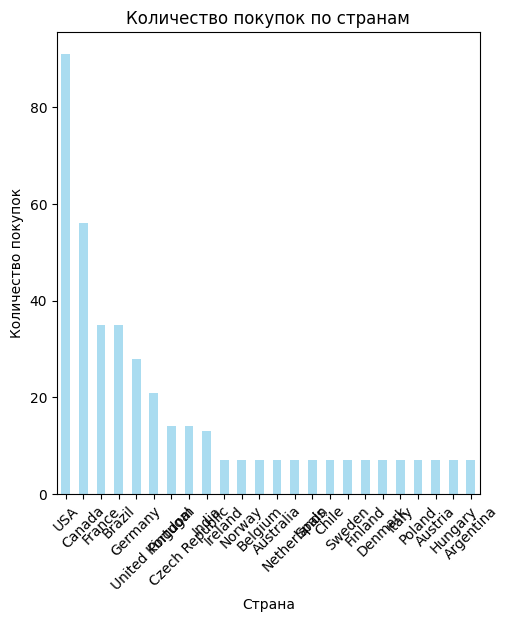

In [41]:
# Ваш код для варианта 30
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt


# 1. Найдите все треки (tracks), название которых заканчивается на 's'.
sql_query1 = """
SELECT TrackId, Name, AlbumId, UnitPrice
FROM tracks
WHERE Name LIKE '%s';
"""

df1 = pd.read_sql_query(sql_query1, conn)
print("Треки, название которых заканчивается на 's':")
display(df1)

# 2. Используя JOIN, выведите имена и фамилии сотрудников (employees) и общее количество клиентов (customers), которых они обслуживают.
sql_query2 = """
SELECT
    e.FirstName,
    e.LastName,
    COUNT(c.CustomerId) as CustomerCount
FROM employees e
LEFT JOIN customers c ON e.EmployeeId = c.SupportRepId
GROUP BY e.EmployeeId, e.FirstName, e.LastName;
"""

df2 = pd.read_sql_query(sql_query2, conn)
print("\nСотрудники и количество их клиентов:")
display(df2)

# 3. Рассчитайте, сколько треков (tracks) было продано из каждого альбома. Выведите топ-5.
sql_query3 = """
SELECT
    a.Title as AlbumTitle,
    ar.Name as ArtistName,
    SUM(ii.Quantity) as TracksSold
FROM albums a
JOIN artists ar ON a.ArtistId = ar.ArtistId
JOIN tracks t ON a.AlbumId = t.AlbumId
JOIN invoice_items ii ON t.TrackId = ii.TrackId
GROUP BY a.AlbumId, a.Title, ar.Name
ORDER BY TracksSold DESC
LIMIT 5;
"""

df3 = pd.read_sql_query(sql_query3, conn)
print("\nТоп-5 альбомов по количеству проданных треков:")
display(df3)

# 4. Получите все треки с их названием и ценой. Загрузите в DataFrame и создайте столбец PriceRank, ранжирующий треки по цене.
sql_query4 = """
SELECT
    TrackId,
    Name as TrackName,
    UnitPrice
FROM tracks;
"""

df4 = pd.read_sql_query(sql_query4, conn)
# Создаем столбец с ранжированием по цене
df4['PriceRank'] = df4['UnitPrice'].rank(method='dense', ascending=False)

print("\nТреки с ранжированием по цене:")
display(df4.head(10))  # Показываем первые 10 для примера

# 5. Получите все счета (invoices) с BillingCountry. Используя Pandas, найдите страны, из которых было совершено менее 5 покупок.
sql_query5 = """
SELECT
    InvoiceId,
    BillingCountry
FROM invoices;
"""

df5 = pd.read_sql_query(sql_query5, conn)

# Используем Pandas для анализа стран с менее чем 5 покупками
country_counts = df5['BillingCountry'].value_counts()
countries_less_than_5 = country_counts[country_counts < 5]

print("\nСтраны с менее чем 5 покупками:")
print(countries_less_than_5)

# Визуализация распределения покупок по странам
plt.figure(figsize=(12, 6))

# График: Все страны
plt.subplot(1, 2, 1)
country_counts.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Количество покупок по странам')
plt.xlabel('Страна')
plt.ylabel('Количество покупок')
plt.xticks(rotation=45)

# Cтатистика
print(f"\nОбщая статистика:")
print(f"Всего стран: {len(country_counts)}")
print(f"Стран с менее чем 5 покупками: {len(countries_less_than_5)}")
print(f"Среднее количество покупок на страну: {country_counts.mean():.1f}")


### Вариант 31
1.  **(SQLite)**: Найдите все треки (`tracks`), у которых `AlbumId` равен 1, 5 или 10.
2.  **(SQLite)**: Используя `JOIN`, выведите названия треков (`tracks`) и их жанр (`genres`), купленных клиентом `Helena Holý`.
3.  **(SQLite)**: Определите общую продолжительность (в минутах) всех плейлистов.
4.  **(Pandas/SQL)**: Получите все треки. Загрузите в DataFrame и создайте столбец `IsLong`, если трек длиннее 5 минут (300000 мс).
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas найдите, сколько покупок было совершено в каждом квартале каждого года.

In [ ]:
# Ваш код для варианта 31

### Вариант 32
1.  **(SQLite)**: Найдите всех клиентов (`customers`), которые живут не в 'USA' и не в 'Canada'.
2.  **(SQLite)**: Используя `JOIN`, выведите имена и фамилии сотрудников и названия должностей их руководителей.
3.  **(SQLite)**: Рассчитайте, сколько треков (`tracks`) было продано каждого медиатипа (`media_types`).
4.  **(Pandas/SQL)**: Получите все треки. Загрузите в DataFrame и создайте столбец `HasComposer`, который будет `True`, если композитор указан.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas найдите, есть ли дубликаты по `InvoiceId`.

In [ ]:
# Ваш код для варианта 32

### Вариант 33
1.  **(SQLite)**: Найдите все треки (`tracks`), которые написал один из композиторов: 'Angus Young, Malcolm Young, Brian Johnson' или 'Kurt Cobain'.
2.  **(SQLite)**: Используя `JOIN`, выведите названия треков (`tracks`) и их альбомов для жанра 'Sci Fi & Fantasy'.
3.  **(SQLite)**: Определите, какой клиент (`customers`) сделал больше всего покупок (по количеству счетов `invoices`).
4.  **(Pandas/SQL)**: Получите все треки с ценой. Загрузите в DataFrame и рассчитайте разницу между ценой каждого трека и средней ценой всех треков.
5.  **(Pandas/SQL)**: Получите всех сотрудников (`employees`). С помощью Pandas определите, у кого из них самая длинная фамилия.

In [ ]:
# Ваш код для варианта 33

### Вариант 34
1.  **(SQLite)**: Найдите все треки (`tracks`), у которых `Bytes` меньше 1 МБ (1024*1024 байт).
2.  **(SQLite)**: Используя `JOIN`, выведите названия плейлистов и количество треков в каждом.
3.  **(SQLite)**: Посчитайте, сколько клиентов из каждой страны (`customers`).
4.  **(Pandas/SQL)**: Получите все треки с их названием и `AlbumId`. Загрузите в DataFrame и проверьте, есть ли альбомы, содержащие только один трек.
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas найдите медианную сумму покупки.

In [ ]:
# Ваш код для варианта 34

### Вариант 35
1.  **(SQLite)**: Найдите все треки (`tracks`), название которых начинается на 'The' и заканчивается на 's'.
2.  **(SQLite)**: Используя `JOIN`, выведите названия треков (`tracks`), которые есть одновременно в плейлистах 'Music' и '90s Music'.
3.  **(SQLite)**: Рассчитайте общую стоимость проданных треков (`UnitPrice` * `Quantity`) для каждого жанра.
4.  **(Pandas/SQL)**: Получите все треки. Загрузите в DataFrame и создайте столбец `GenreId_str` (строковое представление `GenreId`).
5.  **(Pandas/SQL)**: Получите все счета (`invoices`). С помощью Pandas найдите, были ли покупки в каждый из 12 месяцев года (за всю историю).

In [ ]:
# Ваш код для варианта 35

---
### Закрытие подключения
После завершения работы с базой данных хорошей практикой является закрытие подключения.

In [ ]:
if 'conn' in locals() and conn:
    conn.close()
    print("Подключение к базе данных закрыто.")